# LSTM Stock Predictor Using Closing Prices

## Data Preparation

In [413]:
import numpy as np
import pandas as pd
#import hvplot.pandas

In [414]:
# Load DATA Data
df_NFLX = pd.read_csv('../Data/Cleandata/Rawdata/nflx_data.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
df_PDD = pd.read_csv('../Data/Cleandata/Rawdata/pdd_data.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
df_NVDA = pd.read_csv('../Data/Cleandata/Rawdata/nvda_data.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)

# Rename Columns
df_NFLX.columns = ['NFLX Close', 'NFLX Volume']
df_PDD.columns = ['PDD Close', 'PDD Volume']
df_NVDA.columns = ['NVDA Close', 'NVDA Volume']

# Call
df_NFLX.head()
df_PDD.head()
df_NVDA.head()

,NVDA Close,NVDA Volume
Date,,
2019-01-08 16:00:00,139.83,19650429
2019-01-09 16:00:00,142.58,15431475
2019-01-10 16:00:00,145.23,13078906
2019-01-11 16:00:00,148.83,21869066
2019-01-14 16:00:00,150.44,18254249


In [415]:
df_All = pd.concat([df_NFLX, df_PDD, df_NVDA], axis="columns", join="outer")
df_All.head()

,NFLX Close,NFLX Volume,PDD Close,PDD Volume,NVDA Close,NVDA Volume
Date,,,,,,
2019-01-08 16:00:00,320.27,15359180,24.00,3355000,139.83,19650429
2019-01-09 16:00:00,319.96,13343152,25.54,7322212,142.58,15431475
2019-01-10 16:00:00,324.66,13472475,26.38,4956502,145.23,13078906
2019-01-11 16:00:00,337.59,19500429,26.16,2293294,148.83,21869066
2019-01-14 16:00:00,332.94,10499582,24.37,5526588,150.44,18254249


In [416]:
short_span = 12
long_span = 26
df_NFLX['NFLX EMA'] = 0

# Generate Moving Average
df_All['NFLX EMA12'] = df_All['NFLX Close'].ewm(halflife=short_span).mean()
df_All['NFLX EMA26'] = df_All['NFLX Close'].ewm(halflife=long_span).mean()
df_All['PDD EMA12'] = df_All['PDD Close'].ewm(halflife=short_span).mean()
df_All['PDD EMA26'] = df_All['PDD Close'].ewm(halflife=long_span).mean()
df_All['NVDA EMA12'] = df_All['NVDA Close'].ewm(halflife=short_span).mean()
df_All['NVDA EMA26'] = df_All['NVDA Close'].ewm(halflife=long_span).mean()
df_All.tail()

,NFLX Close,NFLX Volume,PDD Close,PDD Volume,NVDA Close,NVDA Volume,NFLX EMA12,NFLX EMA26,PDD EMA12,PDD EMA26,NVDA EMA12,NVDA EMA26
Date,,,,,,,,,,,,
2020-12-31 16:00:00,540.73,5392322,177.67,12490032,522.20,4810610,512.219395,503.603873,142.255318,123.283216,528.344412,518.239082
2021-01-04 16:00:00,522.86,4444407,166.78,10987212,524.54,14016045,512.816607,504.110450,143.631783,124.427500,528.130887,518.404843
2021-01-05 16:00:00,520.80,3133872,187.20,16165814,536.19,8068998,513.264680,504.549507,146.077079,126.078876,528.583210,518.872722
2021-01-06 16:00:00,500.49,5346210,176.75,11873087,504.58,14510575,512.547692,504.442712,147.798618,127.411897,527.236013,518.496719
2021-01-07 16:00:00,508.89,3686448,180.12,8604167,533.76,11537037,512.342402,504.559709,149.612677,128.798506,527.602176,518.898255


In [417]:
# Construct a crossover trading signal
df_All['NFLX Cross Short'] = np.where(df_All['NFLX EMA26'] > df_All['NFLX EMA26'], -1.0, 0.0)
df_All['NFLX Cross Long'] =  np.where(df_All['NFLX EMA12'] > df_All['NFLX EMA26'], 1.0, 0.0)
df_All['PDD Cross Short'] = np.where(df_All['PDD EMA26'] > df_All['PDD EMA26'], -1.0, 0.0)
df_All['PDD Cross Long'] =  np.where(df_All['PDD EMA12'] > df_All['PDD EMA26'], 1.0, 0.0)
df_All['NVDA Cross Short'] = np.where(df_All['NVDA EMA26'] > df_All['NVDA EMA26'], -1.0, 0.0)
df_All['NVDA Cross Long'] =  np.where(df_All['NVDA EMA12'] > df_All['NVDA EMA26'], 1.0, 0.0)
df_All.head()


,NFLX Close,NFLX Volume,PDD Close,PDD Volume,NVDA Close,NVDA Volume,NFLX EMA12,NFLX EMA26,PDD EMA12,PDD EMA26,NVDA EMA12,NVDA EMA26,NFLX Cross Short,NFLX Cross Long,PDD Cross Short,PDD Cross Long,NVDA Cross Short,NVDA Cross Long
Date,,,,,,,,,,,,,,,,,,
2019-01-08 16:00:00,320.27,15359180,24.00,3355000,139.83,19650429,320.270000,320.270000,24.000000,24.000000,139.830000,139.830000,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-09 16:00:00,319.96,13343152,25.54,7322212,142.58,15431475,320.110525,320.112934,24.792232,24.780263,141.244701,141.223327,0.0,0.0,0.0,1.0,0.0,1.0
2019-01-10 16:00:00,324.66,13472475,26.38,4956502,145.23,13078906,321.715406,321.669205,25.352336,25.327786,142.650562,142.594644,0.0,1.0,0.0,1.0,0.0,1.0
2019-01-11 16:00:00,337.59,19500429,26.16,2293294,148.83,21869066,326.034237,325.809955,25.572069,25.544232,144.331736,144.216363,0.0,1.0,0.0,1.0,0.0,1.0
2019-01-14 16:00:00,332.94,10499582,24.37,5526588,150.44,18254249,327.579368,327.312992,25.303112,25.296700,145.698430,145.528326,0.0,1.0,0.0,1.0,0.0,1.0


In [418]:
# Load LSTM Data
df_NFLX = pd.read_csv('../Data/Cleandata/LSTM_NFLX.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
df_PDD = pd.read_csv('../Data/Cleandata/LSTM_PDD.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
df_NVDA = pd.read_csv('../Data/Cleandata/LSTM_NVDA.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)

# Rename Columns
df_NFLX.columns = ['NFLX Real', 'NFLX Predicted']
df_PDD.columns = ['PDD Real', 'PDD Predicted']
df_NVDA.columns = ['NVDA Real', 'NVDA Predicted']

# Call
df_NFLX.head()
df_PDD.head()
df_NVDA.head()

,NVDA Real,NVDA Predicted
Date,,
2019-08-21 16:00:00,149.87,151.18695
2019-08-22 16:00:00,148.84,153.20126
2019-08-23 16:00:00,151.72,154.94188
2019-08-26 16:00:00,156.93,156.30083
2019-08-27 16:00:00,148.77,156.88548


In [419]:
df_AllFinal = pd.concat([df_All, df_NFLX, df_PDD, df_NVDA], axis="columns", join="inner")
print(df_AllFinal)

                     NFLX Close  NFLX Volume  PDD Close  PDD Volume  \
Date                                                                  
2019-08-21 16:00:00      297.81      5689746      30.11    42238412   
2019-08-22 16:00:00      296.93      4977042      30.59    20527852   
2019-08-23 16:00:00      291.44      6331189      29.49    11150581   
2019-08-26 16:00:00      294.98      4696982      30.61     8921197   
2019-08-27 16:00:00      291.03      6314559      30.87     7329734   
...                         ...          ...        ...         ...   
2020-12-31 16:00:00      540.73      5392322     177.67    12490032   
2021-01-04 16:00:00      522.86      4444407     166.78    10987212   
2021-01-05 16:00:00      520.80      3133872     187.20    16165814   
2021-01-06 16:00:00      500.49      5346210     176.75    11873087   
2021-01-07 16:00:00      508.89      3686448     180.12     8604167   

                     NVDA Close  NVDA Volume  NFLX EMA12  NFLX EMA26  \
Date

In [420]:
# LSTM Signal;
LSTM_pct = .05

NFLX_Sell = 1 - df_AllFinal['NFLX Real']/df_AllFinal['NFLX Predicted']
NFLX_Buy = df_AllFinal['NFLX Predicted']/df_AllFinal['NFLX Real'] - 1
PDD_Sell = 1 - df_AllFinal['PDD Real']/df_AllFinal['PDD Predicted']
PDD_Buy = df_AllFinal['PDD Predicted']/df_AllFinal['PDD Real'] - 1
NVDA_Sell = 1 - df_AllFinal['NVDA Real']/df_AllFinal['NVDA Predicted']
NVDA_Buy = df_AllFinal['NVDA Predicted']/df_AllFinal['NVDA Real'] - 1
df_AllFinal['NFLX LSTM Sig'] = np.where(NFLX_Sell > LSTM_pct, -1.0, 0.0) + np.where(NFLX_Buy > LSTM_pct, 1.0, 0.0)
df_AllFinal['PDD LSTM Sig'] = np.where(PDD_Sell > LSTM_pct, -1.0, 0.0) + np.where(PDD_Buy > LSTM_pct, 1.0, 0.0)
df_AllFinal['NVDA LSTM Sig'] = np.where(NVDA_Sell > LSTM_pct, -1.0, 0.0) + np.where(NVDA_Buy > LSTM_pct, 1.0, 0.0)
print(df_AllFinal)
df_AllFinal.to_csv('../Data/Cleandata/TestFinal1.csv')






                     NFLX Close  NFLX Volume  PDD Close  PDD Volume  \
Date                                                                  
2019-08-21 16:00:00      297.81      5689746      30.11    42238412   
2019-08-22 16:00:00      296.93      4977042      30.59    20527852   
2019-08-23 16:00:00      291.44      6331189      29.49    11150581   
2019-08-26 16:00:00      294.98      4696982      30.61     8921197   
2019-08-27 16:00:00      291.03      6314559      30.87     7329734   
...                         ...          ...        ...         ...   
2020-12-31 16:00:00      540.73      5392322     177.67    12490032   
2021-01-04 16:00:00      522.86      4444407     166.78    10987212   
2021-01-05 16:00:00      520.80      3133872     187.20    16165814   
2021-01-06 16:00:00      500.49      5346210     176.75    11873087   
2021-01-07 16:00:00      508.89      3686448     180.12     8604167   

                     NVDA Close  NVDA Volume  NFLX EMA12  NFLX EMA26  \
Date

In [421]:
1 - df_AllFinal['NFLX Real']/df_AllFinal['NFLX Predicted']

Date
2019-08-21 16:00:00   -0.096402
2019-08-22 16:00:00   -0.074757
2019-08-23 16:00:00   -0.061097
2019-08-26 16:00:00    0.001233
2019-08-27 16:00:00    0.051122
                         ...   
2020-12-31 16:00:00    0.066233
2021-01-04 16:00:00    0.025076
2021-01-05 16:00:00   -0.006616
2021-01-06 16:00:00   -0.022031
2021-01-07 16:00:00   -0.003584
Length: 349, dtype: float64

In [422]:
# Net EMA
df_AllFinal['NFLX EMA Net Sig'] = df_AllFinal['NFLX Cross Short']+ df_AllFinal['NFLX Cross Long']
df_AllFinal['PDD EMA Net Sig'] = df_AllFinal['PDD Cross Short']+ df_AllFinal['PDD Cross Long']
df_AllFinal['NVDA EMA Net Sig'] = df_AllFinal['NVDA Cross Short']+ df_AllFinal['NVDA Cross Long']
print(df_AllFinal)

                     NFLX Close  NFLX Volume  PDD Close  PDD Volume  \
Date                                                                  
2019-08-21 16:00:00      297.81      5689746      30.11    42238412   
2019-08-22 16:00:00      296.93      4977042      30.59    20527852   
2019-08-23 16:00:00      291.44      6331189      29.49    11150581   
2019-08-26 16:00:00      294.98      4696982      30.61     8921197   
2019-08-27 16:00:00      291.03      6314559      30.87     7329734   
...                         ...          ...        ...         ...   
2020-12-31 16:00:00      540.73      5392322     177.67    12490032   
2021-01-04 16:00:00      522.86      4444407     166.78    10987212   
2021-01-05 16:00:00      520.80      3133872     187.20    16165814   
2021-01-06 16:00:00      500.49      5346210     176.75    11873087   
2021-01-07 16:00:00      508.89      3686448     180.12     8604167   

                     NVDA Close  NVDA Volume  NFLX EMA12  NFLX EMA26  \
Date

In [423]:
# Combined Signal
NFLX_SELL = np.where(df_AllFinal['NFLX EMA Net Sig'] + df_AllFinal['NFLX LSTM Sig'] == -2 , -1.0, 0.0)
NFLX_BUY = np.where(df_AllFinal['NFLX EMA Net Sig'] + df_AllFinal['NFLX LSTM Sig'] == 2 , 1.0, 0.0)
PDD_SELL = np.where(df_AllFinal['PDD EMA Net Sig'] + df_AllFinal['PDD LSTM Sig'] == -2 , -1.0, 0.0)
PDD_BUY = np.where(df_AllFinal['PDD EMA Net Sig'] + df_AllFinal['PDD LSTM Sig'] == 2 , 1.0, 0.0)
NVDA_SELL = np.where(df_AllFinal['NVDA EMA Net Sig'] + df_AllFinal['NVDA LSTM Sig'] == -2 , -1.0, 0.0)
NVDA_BUY = np.where(df_AllFinal['NVDA EMA Net Sig'] + df_AllFinal['NVDA LSTM Sig'] == 2 , 1.0, 0.0)

df_AllFinal['NFLX Trade Signal'] = NFLX_BUY + NFLX_SELL
df_AllFinal['PDD Trade Signal'] = PDD_BUY + PDD_SELL
df_AllFinal['NVDA Trade Signal'] = NVDA_BUY + PDD_SELL

print(df_AllFinal)

                     NFLX Close  NFLX Volume  PDD Close  PDD Volume  \
Date                                                                  
2019-08-21 16:00:00      297.81      5689746      30.11    42238412   
2019-08-22 16:00:00      296.93      4977042      30.59    20527852   
2019-08-23 16:00:00      291.44      6331189      29.49    11150581   
2019-08-26 16:00:00      294.98      4696982      30.61     8921197   
2019-08-27 16:00:00      291.03      6314559      30.87     7329734   
...                         ...          ...        ...         ...   
2020-12-31 16:00:00      540.73      5392322     177.67    12490032   
2021-01-04 16:00:00      522.86      4444407     166.78    10987212   
2021-01-05 16:00:00      520.80      3133872     187.20    16165814   
2021-01-06 16:00:00      500.49      5346210     176.75    11873087   
2021-01-07 16:00:00      508.89      3686448     180.12     8604167   

                     NVDA Close  NVDA Volume  NFLX EMA12  NFLX EMA26  \
Date

In [424]:
df_Trade_Signals = df_AllFinal[['NFLX Trade Signal','PDD Trade Signal','NVDA Trade Signal']]
df_Trade_Signals.head()


,NFLX Trade Signal,PDD Trade Signal,NVDA Trade Signal
Date,,,
2019-08-21 16:00:00,0.0,0.0,0.0
2019-08-22 16:00:00,0.0,1.0,0.0
2019-08-23 16:00:00,0.0,0.0,0.0
2019-08-26 16:00:00,0.0,0.0,0.0
2019-08-27 16:00:00,0.0,0.0,0.0


<AxesSubplot:xlabel='Date'>

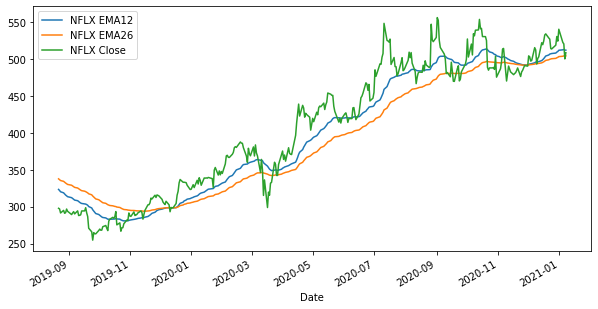

In [441]:
import matplotlib.pyplot as plt
df_AllFinal[['NFLX EMA12','NFLX EMA26','NFLX Close']].plot(figsize=(10,5))



<AxesSubplot:xlabel='Date'>

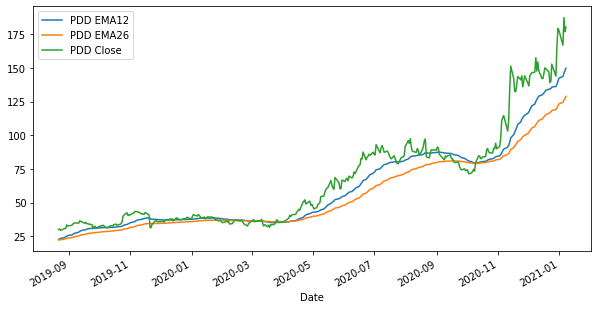

In [442]:
df_AllFinal[['PDD EMA12','PDD EMA26','PDD Close']].plot(figsize=(10,5))

<AxesSubplot:xlabel='Date'>

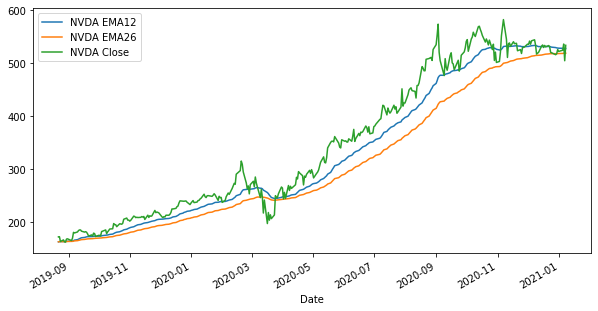

In [444]:
df_AllFinal[['NVDA EMA12','NVDA EMA26','NVDA Close']].plot(figsize=(10,5))

<AxesSubplot:xlabel='Date'>

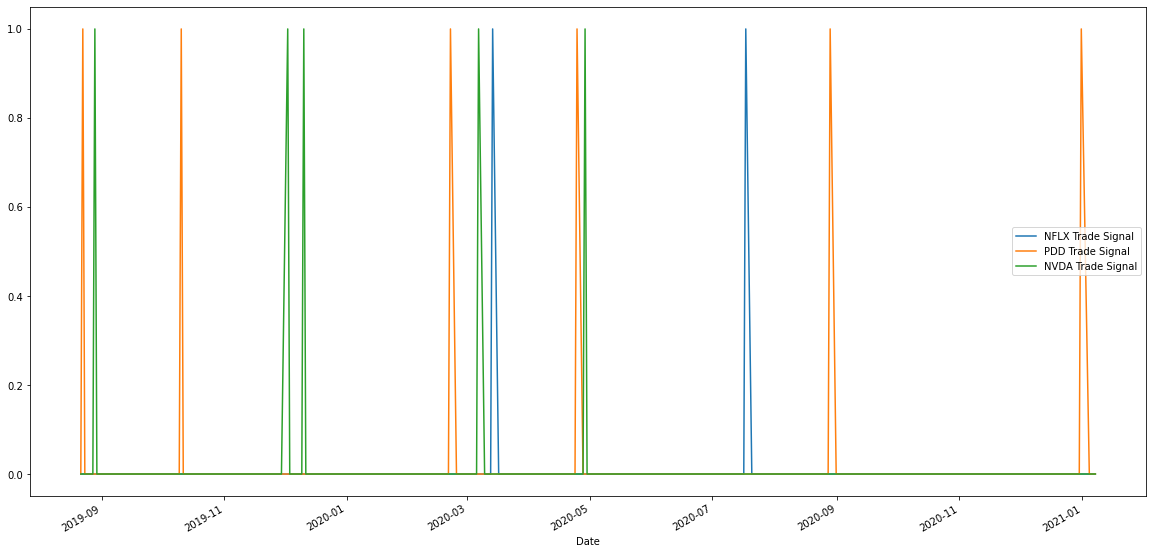

In [427]:
df_Trade_Signals.plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

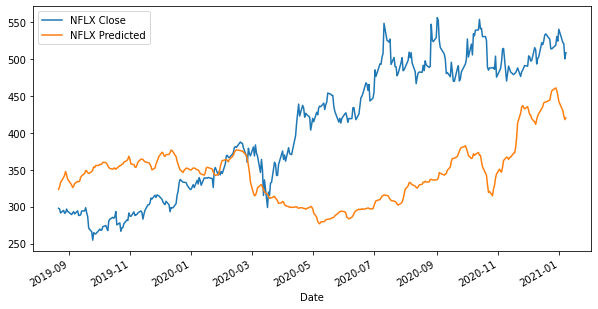

In [445]:
df_AllFinal[['NFLX Close','NFLX Predicted']].plot(figsize=(10,5))

<AxesSubplot:xlabel='Date'>

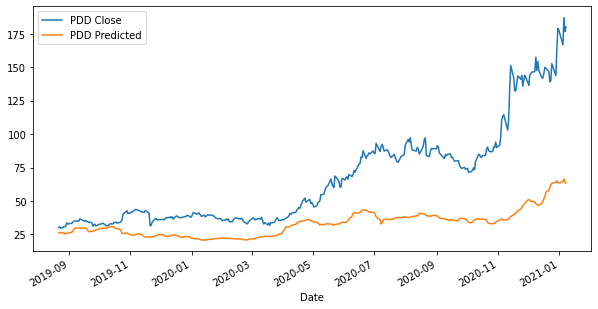

In [446]:
df_AllFinal[['PDD Close','PDD Predicted']].plot(figsize=(10,5))

<AxesSubplot:xlabel='Date'>

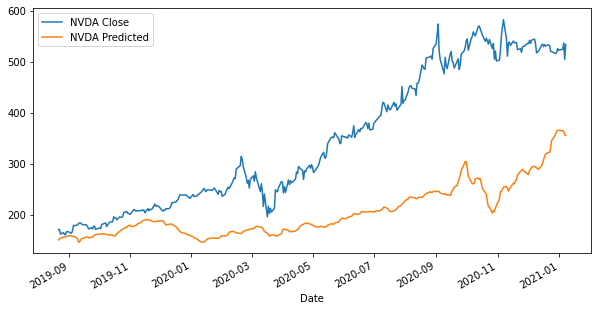

In [443]:
df_AllFinal[['NVDA Close','NVDA Predicted']].plot(figsize=(10,5))

In [439]:
df = pd.DataFrame(df_Trade_Signals)
df = df[(df.T !=0).any()]
df

,NFLX Trade Signal,PDD Trade Signal,NVDA Trade Signal
Date,,,
2019-08-22 16:00:00,0.0,1.0,0.0
2019-08-28 16:00:00,0.0,0.0,1.0
2019-10-10 16:00:00,0.0,1.0,0.0
2019-12-02 16:00:00,0.0,0.0,1.0
2019-12-10 16:00:00,0.0,0.0,1.0
2020-02-21 16:00:00,0.0,1.0,0.0
2020-03-06 16:00:00,0.0,0.0,1.0
2020-03-13 16:00:00,1.0,0.0,0.0
2020-04-24 16:00:00,0.0,1.0,0.0
